In [1]:
import tensorflow as tf
from tensorflow import keras
import datetime as dt
from tensorflow.keras import datasets, layers, models 
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt


In [2]:
image_size_x=270
image_size_y=350

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("kims2", shuffle = True, image_size= (image_size_x,image_size_y), batch_size = 1 )

Found 564 files belonging to 2 classes.


In [4]:
class_name = dataset.class_names
class_name

['polyps_sorted', 'ulcerative-colitis_sorted']

In [5]:
len(dataset)

564

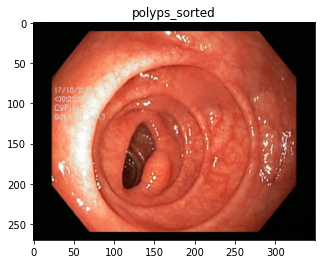

In [6]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[label_batch[0]])
    

In [7]:
train_size=0.8
len(dataset)*train_size

451.20000000000005

In [8]:
train_ds= dataset.take(451)
len(train_ds)

451

In [9]:
test_ds = dataset.skip(451)
len(test_ds)

113

In [10]:
val_size=0.1
len(dataset)*val_size

56.400000000000006

In [11]:
val_ds= test_ds.take(56)

In [12]:
test_ds=test_ds.skip(56)
len(test_ds)

57

In [13]:
len(train_ds)

451

In [14]:
len(test_ds)

57

In [15]:
len(val_ds)

56

In [16]:
len(dataset)

564

In [17]:
train_ds=train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_rescale= tf.keras.Sequential(
[
    layers.experimental.preprocessing.Resizing(270,350),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
model = models.Sequential(
[
    resize_rescale,
    layers.Conv2D(64, (3, 3), activation= 'relu', input_shape=(1,270, 350,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation= 'relu'),
    layers.Conv2D(32, (3, 3), activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation= 'relu'),
    layers.Dense(32,activation= 'relu'),
    layers.Dense(2,activation= 'softmax'),
    

])

In [20]:
model.build(input_shape = (1,270,350,3))

In [21]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (1, 120, 96, 3)           0         
                                                                 
 conv2d (Conv2D)             (1, 118, 94, 64)          1792      
                                                                 
 max_pooling2d (MaxPooling2D  (1, 59, 47, 64)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (1, 57, 45, 128)          73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 28, 22, 128)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (1, 26, 20, 64)          

In [22]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
history= model.fit(
    train_ds,
    epochs=20,
    batch_size=1,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
451/451 [==============================] - 14s 31ms/step - loss: 0.2464 - accuracy: 0.8980 - val_loss: 0.2950 - val_accuracy: 0.8750
Epoch 2/20
451/451 [==============================] - 12s 27ms/step - loss: 0.1957 - accuracy: 0.9180 - val_loss: 0.2297 - val_accuracy: 0.8929
Epoch 3/20
451/451 [==============================] - 12s 27ms/step - loss: 0.1885 - accuracy: 0.9313 - val_loss: 0.3287 - val_accuracy: 0.8750
Epoch 4/20
451/451 [==============================] - 12s 27ms/step - loss: 0.1495 - accuracy: 0.9357 - val_loss: 0.6770 - val_accuracy: 0.8571
Epoch 5/20
451/451 [==============================] - 12s 27ms/step - loss: 0.1576 - accuracy: 0.9557 - val_loss: 0.6193 - val_accuracy: 0.8036
Epoch 6/20
451/451 [==============================] - 12s 27ms/step - loss: 0.0743 - accuracy: 0.9800 - val_loss: 1.6886 - val_accuracy: 0.8393
Epoch 7/20
451/451 [==============================] - 12s 27ms/step - loss: 0.3244 - accuracy: 0.8825 - val_loss: 0.4080 - val_accuracy:

In [29]:
acc=model.evaluate(test_ds)

57/57 [==============================] - 1s 14ms/step - loss: 0.5341 - accuracy: 0.9474


In [30]:
acc

[0.534112811088562, 0.9473684430122375]

In [31]:
t_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

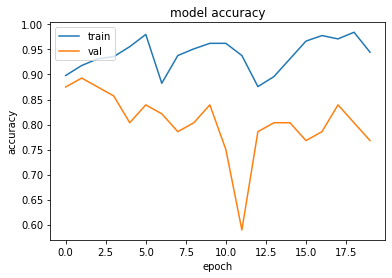

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

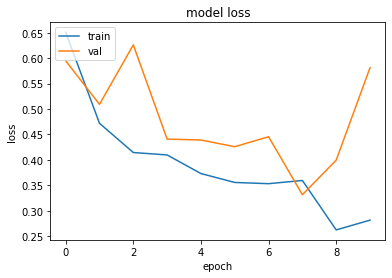

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
model.save('model_gastrointestine.h5')

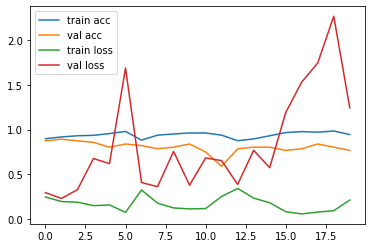

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'val acc' ,'train loss', 'val loss'], loc='upper left')
plt.show()